In [50]:
import copy
#packages we'll need

%matplotlib inline 
#this is a ``magic command'' specific to display plots in-line in a jupyter notebook
#normally you would plot by calling a plt.show()

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'serif'
plt.rcParams["font.serif"] = 'Times'
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 18
plt.rcParams["legend.fontsize"] = 18
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["mathtext.it"] = "serif:italic"
plt.rcParams["mathtext.bf"] = "serif:bold"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.usetex'] = True
import numpy as np
from matplotlib.colors import LogNorm
from sklearn.metrics import r2_score
#need this for the colourbar of the 2D histogram

import matplotlib
matplotlib.rcParams.update({'font.size': 14})

import sys
sys.path.insert(0, '../scripts/')


from DataAnalysis import DataAnalysis

In [2]:
# mc = DataAnalysis(load=True, eventfile="./data/new_moo/3-31/MC_events.csv", clusterfile="./data/new_moo/3-31/MC_clusters.csv")
# moo = DataAnalysis(load=True, eventfile="./data/new_moo/3-31/events.csv", clusterfile="./data/new_moo/3-31/clusters.csv")

mc = DataAnalysis(load=True, eventfile="../MC_events.csv", clusterfile="../MC_clusters.csv")
moo_perfect = DataAnalysis(load=True, eventfile="../perfect_events.csv", clusterfile="../perfect_clusters.csv")
moo_ideal = DataAnalysis(load=True, eventfile="../ideal_events.csv", clusterfile="../ideal_clusters.csv")
moo_cuore = DataAnalysis(load=True, eventfile="../cuore_events.csv", clusterfile="../cuore_clusters.csv")
naive = DataAnalysis(load=True, eventfile="../naive_events.csv", clusterfile="../naive_clusters.csv")

In [3]:
# naive = DataAnalysis()
# naive.load_eventdf("../perfect_events.csv")
# naive.make_clusterdf(basicfit=True)

In [4]:
mc.filter_fit(100,5)
# naive.filter_fit(100,5)
moo_perfect.filter_fit(100,5)
moo_ideal.filter_fit(100,5)
moo_cuore.filter_fit(100,5)
naive.filter_fit(100,5)


#mc.clusterdf = mc.clusterdf[mc.clusterdf['Channels'] <= 5]
#naive.clusterdf = naive.clusterdf[naive.clusterdf['Channels'] <= 5]
#moo.clusterdf = moo.clusterdf[moo.clusterdf['Channels'] <= 5]

In [ ]:
# mc.clusterdf = mc.clusterdf[mc.clusterdf['Cluster'].isin(moo_perfect.clusterdf['Cluster'])]
# mc.eventdf = mc.eventdf[mc.eventdf['Cluster'].isin(moo_perf.clusterdf['Cluster'])]

# naive.clusterdf = naive.clusterdf[naive.clusterdf['Cluster'].isin(moo.clusterdf['Cluster'])]
# naive.eventdf = naive.eventdf[naive.eventdf['Cluster'].isin(moo.clusterdf['Cluster'])]

In [6]:
moo_perfect.get_eventdf()

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,Track,MaxTime,Cluster,Hit,PathLength,dEdx
0,0,29,2.005000e+03,1,3.2,3.2,21721.320963,0.0,0.0,0.0,False,0,2.008200e+03,0,True,2.988074,7269.337151
1,0,30,2.005010e+03,1,3.2,3.2,23220.651990,0.0,0.0,0.0,False,0,2.008210e+03,0,True,32.945824,704.813210
2,0,67,2.005020e+03,1,3.2,3.2,41423.728037,0.0,0.0,0.0,False,0,2.008220e+03,0,True,44.062340,940.116388
3,0,68,2.005030e+03,1,3.2,3.2,2316.337003,0.0,0.0,0.0,False,0,2.008230e+03,0,True,16.261858,142.439873
4,0,80,2.005040e+03,1,3.2,3.2,1016.864262,0.0,0.0,0.0,False,0,2.008240e+03,0,True,1.449037,701.751583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69257,0,282,1.103921e+08,1,3.2,3.2,31238.917416,0.0,0.0,0.0,False,9999,1.103921e+08,9096,True,37.978634,822.539257
69258,0,294,1.103921e+08,1,3.2,3.2,45710.337886,0.0,0.0,0.0,False,9999,1.103921e+08,9096,True,50.340749,908.018625
69259,0,804,1.103921e+08,1,3.2,3.2,877.286508,0.0,0.0,0.0,False,9999,1.103921e+08,9096,True,1.091535,803.717883
69260,0,897,1.103921e+08,1,3.2,3.2,15261.822259,0.0,0.0,0.0,False,9999,1.103921e+08,9096,True,19.495806,782.825938


In [ ]:
moo.get_eventdf()

In [ ]:
mc.get_eventdf()

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Azimuth")
true = np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi
pred = np.array(moo.get_clusterdf()['Azimuth']) * 180 / np.pi
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=.1, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
#plt.scatter(np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi, np.array(moo.get_clusterdf()['Azimuth']) * 180 / np.pi, s=1)
plt.xlabel("degrees (generated)")
plt.ylabel("degrees (reconstructed)")
plt.legend()

In [ ]:
sum(abs(true-pred)) / len(true)

In [ ]:
from Helper import *

dEdx_pdf = make_pdf('../data/pdf/dEdx/bins_dEdx_muon.csv', '../data/pdf/dEdx/values_dEdx_muon.csv', domain_range=[0,190])
clusters = np.array(mc.get_clusterdf()['Cluster'])

log_likelihoods_mc = np.array([np.log(dEdx_pdf(np.array(mc.get_cluster(c)['dEdx'])/100)).sum() for c in clusters])
log_likelihoods_moo = np.array([np.log(dEdx_pdf(np.array(moo.get_cluster(c)['dEdx'])/100)).sum() for c in clusters])


# min_path_test = test.get_eventdf()[test.get_eventdf()['PathLength'] > 30]
# min_path_mc = mc.get_eventdf()[test.get_eventdf()['PathLength'] > 30]

plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.title("dEdx")
#plt.scatter(np.array(mc.get_eventdf()['dEdx'])/100, np.array(test.get_eventdf()['dEdx'])/100, s=5)
true = np.array(mc.get_eventdf()['dEdx'])/100
pred = np.array(moo.get_eventdf()['dEdx'])/100
#r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=.05) #, label=r'$r^2='+str(round(r2,5)) + '$')
plt.xlabel("MeV/cm (generated)")
plt.ylabel("MeV/cm (reconstructed)")
plt.xlim(4,30)
plt.ylim(4,30)
#plt.xscale('log')
#plt.yscale('log')
#plt.legend()

plt.subplot(2,3,2)
plt.title("dEdx log-likelihoods")
true = log_likelihoods_mc
pred = log_likelihoods_moo
# r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=.05)
#plt.scatter(, , s=1)
plt.xlim(-100,0)
plt.ylim(-100,0)
plt.xlabel("log(likelihood) (generated)")
plt.ylabel("log(likelihood) (reconstructed)")
# plt.legend()

plt.subplot(2,3,3)
plt.title("Pathlengths")
true = np.array(mc.get_eventdf()['PathLength'])
pred = np.array(moo.get_eventdf()['PathLength'])
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
plt.scatter(true,pred , s=.05, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
plt.ylabel("mm (reconstructed)")
plt.xlabel("mm (generated)")
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()

plt.subplot(2,3,4)
plt.title("Zenith")
true = np.array(mc.get_clusterdf()['Zenith']) * 180 / np.pi
pred = np.array(moo.get_clusterdf()['Zenith']) * 180 / np.pi
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=.1, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
plt.xlabel("degrees (generated)")
plt.ylabel("degrees (reconstructed)")
plt.legend()

plt.subplot(2,3,5)
plt.title("Azimuth")
true = np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi
pred = np.array(moo.get_clusterdf()['Azimuth']) * 180 / np.pi
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=.1, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
#plt.scatter(np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi, np.array(moo.get_clusterdf()['Azimuth']) * 180 / np.pi, s=1)
plt.xlabel("degrees (generated)")
plt.ylabel("degrees (reconstructed)")
plt.legend()

plt.tight_layout()


In [ ]:
from Helper import *

dEdx_pdf = make_pdf('../data/pdf/dEdx/bins_dEdx_muon.csv', '../data/pdf/dEdx/values_dEdx_muon.csv', domain_range=[0,190])
clusters = np.array(mc.get_clusterdf()['Cluster'])

log_likelihoods_mc = np.array([np.log(dEdx_pdf(np.array(mc.get_cluster(c)['dEdx'])/100)).sum() for c in clusters])
log_likelihoods_moo = np.array([np.log(dEdx_pdf(np.array(moo.get_cluster(c)['dEdx'])/100)).sum() for c in clusters])


# min_path_test = test.get_eventdf()[test.get_eventdf()['PathLength'] > 30]
# min_path_mc = mc.get_eventdf()[test.get_eventdf()['PathLength'] > 30]



plt.figure(figsize=(6,6))
plt.title("dEdx")
#plt.scatter(np.array(mc.get_eventdf()['dEdx'])/100, np.array(test.get_eventdf()['dEdx'])/100, s=5)
true = np.array(mc.get_eventdf()['dEdx'])/100
pred = np.array(moo.get_eventdf()['dEdx'])/100
#r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=.05) #, label=r'$r^2='+str(round(r2,5)) + '$')
plt.xlabel("MeV/cm (generated)")
plt.ylabel("MeV/cm (reconstructed)")
plt.xlim(4,30)
plt.ylim(4,30)
#plt.xscale('log')
#plt.yscale('log')
#plt.legend()

plt.figure(figsize=(6,6))
plt.title("dEdx log-likelihoods")
true = log_likelihoods_mc
pred = log_likelihoods_moo
# r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=.1)
#plt.scatter(, , s=1)
plt.xlim(-100,0)
plt.ylim(-100,0)
plt.xlabel("log(likelihood) (generated)")
plt.ylabel("log(likelihood) (reconstructed)")
# plt.legend()





In [ ]:
plt.figure(figsize=(6,6))
# plt.title("MOO Pathlength Reconstruction (~12000 Crystals)")
true = np.array(mc.get_eventdf()['PathLength'])
pred = np.array(moo.get_eventdf()['PathLength'])
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
plt.scatter(true,pred , s=.05, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
plt.ylabel("Reconstructed Track Length (mm)")
plt.xlabel("Simulated Track Length (mm)")
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()
plt.savefig('../plots/pdf/MOO_Pathlengths.pdf',bbox_inches = "tight")
plt.savefig('../plots/png/MOO_Pathlengths.png',dpi=300,bbox_inches = "tight")

plt.figure(figsize=(6,6))
# plt.title("Naive Pathlength Reconstruction (~12000 Crystals)")
true = np.array(mc.get_eventdf()['PathLength'])
pred = np.array(naive.get_eventdf()['PathLength'])
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
plt.scatter(true,pred , s=.05, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
plt.ylabel("Reconstructed Track Length (mm)")
plt.xlabel("Simulated Track Length (mm)")
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()
plt.savefig('../plots/pdf/Naive_Pathlengths.pdf',bbox_inches = "tight")
plt.savefig('../plots/png/Naive_Pathlengths.png',dpi=300,bbox_inches = "tight")

In [ ]:
SUB_FONTSIZE = 22

In [ ]:
plt.figure(figsize=(6,6))
#plt.title("MOO Zenith Reconstruction ~1300 Muons")
true = np.array(mc.get_clusterdf()['Zenith']) * 180 / np.pi
pred = np.array(moo.get_clusterdf()['Zenith']) * 180 / np.pi
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
moo_zenith_err = pred - true
r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=1, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
plt.xlabel(r"$\theta_ \mathrm{generated}$ (degrees)", fontsize=SUB_FONTSIZE)
plt.ylabel(r"$\theta_ \mathrm{reconstructed}$ (degrees)", fontsize=SUB_FONTSIZE)
plt.legend()
plt.savefig('../plots/png/Zenith.png',dpi=300,bbox_inches = "tight")
plt.savefig('../plots/pdf/Zenith.pdf',bbox_inches = "tight")

plt.figure(figsize=(6,6))
plt.title("Naive Zenith Reconstruction ~1300 Muons")
true = np.array(mc.get_clusterdf()['Zenith']) * 180 / np.pi
pred = np.array(naive.get_clusterdf()['Zenith']) * 180 / np.pi
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
naive_zenith_err = pred - true
r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=1, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
plt.xlabel("degrees (generated)", fontsize=SUB_FONTSIZE)
plt.ylabel("degrees (reconstructed)", fontsize=SUB_FONTSIZE)
plt.legend()

In [ ]:
plt.figure()
plt.xlabel("degrees")
plt.ylabel("count")
plt.hist(moo_zenith_err, np.linspace(-5,5,21), histtype='step')
plt.hist(naive_zenith_err, np.linspace(-5,5,21), histtype='step')

In [ ]:
plt.figure(figsize=(6,6))
#plt.title("MOO Azimuth Reconstruction (~1300 Muons)")
true = np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi
pred = np.array(moo.get_clusterdf()['Azimuth']) * 180 / np.pi
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
moo_azimuth_err = pred - true
r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=1, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
#plt.scatter(np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi, np.array(moo.get_clusterdf()['Azimuth']) * 180 / np.pi, s=1)
plt.xlabel(r"$\phi_ \mathrm{generated}$ (degrees)", fontsize=SUB_FONTSIZE)
plt.ylabel(r"$\phi_ \mathrm{reconstructed}$ (degrees)", fontsize=SUB_FONTSIZE)
plt.legend()
plt.savefig('../plots/png/Azimuth.png',dpi=300,bbox_inches = "tight")
plt.savefig('../plots/pdf/Azimuth.pdf',bbox_inches = "tight")

plt.figure(figsize=(6,6))
plt.title("Naive Azimuth Reconstruction (~1300 Muons)")
true = np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi
pred = np.array(naive.get_clusterdf()['Azimuth']) * 180 / np.pi
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
naive_azimuth_err = pred - true
r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=1, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
#plt.scatter(np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi, np.array(moo.get_clusterdf()['Azimuth']) * 180 / np.pi, s=1)
plt.xlabel("degrees (generated)", fontsize=SUB_FONTSIZE)
plt.ylabel("degrees (reconstructed)", fontsize=SUB_FONTSIZE)
plt.legend()

In [ ]:
plt.figure()
plt.xlabel("degrees")
plt.ylabel("count")
plt.hist(moo_azimuth_err, np.linspace(0,5,21), histtype='step')
plt.hist(naive_azimuth_err, np.linspace(0,5,21), histtype='step')

In [ ]:
from matplotlib import colors
# plt.scatter(moo_zenith_err, moo_azimuth_err, s=1)
fig, ax = plt.subplots(1,1)
ax.set_facecolor(plt.get_cmap("viridis")(0))
h = ax.hist2d(moo_zenith_err, moo_azimuth_err, bins=(120,360), norm=colors.LogNorm())
ax.set_xlabel(r"$\theta_ \mathrm{reconsctructed}-\theta_ \mathrm{generated}$", fontsize=SUB_FONTSIZE)
ax.set_ylabel(r"$\phi_ \mathrm{reconsctructed}-\phi_ \mathrm{generated}$", fontsize=SUB_FONTSIZE)
ax.set_ylim(-12,12)
ax.set_xlim(-3,3)
cb = fig.colorbar(h[3], ax=ax)
plt.savefig('../plots/png/CorrelatedCosThetaVsPhi.png',dpi=300,bbox_inches = "tight")
plt.savefig('../plots/pdf/CorrelatedCosThetaVsPhi.pdf',bbox_inches = "tight")

In [ ]:
print(moo_zenith_err.mean())
print(moo_zenith_err.std())
print(moo_azimuth_err.mean())
print(moo_azimuth_err.std())

In [ ]:
moo.get_clusterdf(fitline=False)

In [ ]:
mc.get_clusterdf(fitline=False)

In [ ]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
array1=plt.hist(moo.get_eventdf()['Channel'].values, np.linspace(0,989,990) , histtype='step', color='r')#np.linspace function is hlepful for generating bins
array1 = plt.hist(mc.get_eventdf()['Channel'].values, np.linspace(0,989,990), histtype='step')#np.linspace function is hlepful for generating bins
plt.title("Events Per Channel (filtered)", fontsize=16)
plt.xlabel('Channel #',fontsize=14)
plt.ylabel('Channel Events',fontsize=14)
#plt.gca().set_yscale("log")


#plt.savefig('plots/pdf/EventsPerChannel.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventsPerChannel.png',dpi=300,bbox_inches = "tight")


plt.figure(figsize=(7,5))
plt.hist(array1[0], np.linspace(1,6,100), histtype='step')
#plt.hist(array2[0], np.linspace(1,6,100),color='b', histtype='step')
plt.title("Event Frequencies (filtered)",fontsize=16)
plt.xlabel('Events Per Channel',fontsize=14)
plt.ylabel('Number of Channels',fontsize=14)
#plt.gca().set_yscale("log")
#plt.gca().set_xscale("log")


#plt.savefig('../plots/pdf/EventFrequency.pdf',bbox_inches = "tight")
#plt.savefig('../plots/png/EventFrequency.png',dpi=300,bbox_inches = "tight")

In [ ]:
#print("Messy cluster rate: " + str(naive.get_clusterrate()))
print("Messy cluster rate: " + str(moo.get_clusterrate()))
#data.filter_clusterdf(100, 5) #(NRMSE, channels)
#print("Filtered cluster rate: " + str(data.get_clusterrate()))
print("MC cluster rate: " + str(mc.get_clusterrate()))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#fig.suptitle('Horizontally stacked subplots')
plt.subplots_adjust(wspace=.4)

ax1.set_title("Events Distribution", fontsize=16)
ax1.set_xlabel("Events in Cluster", fontsize=14)
ax1.set_ylabel("Num of Clusters", fontsize=14)
#ax1.hist(messydata.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step', color='r')
ax1.hist(mc.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step')



ax2.set_title("Channel Distribution", fontsize=16)
ax2.set_xlabel("Channels in Cluster", fontsize=14)
ax2.set_ylabel("Num of Clusters", fontsize=14)
#ax2.hist(messydata.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step', color='r')
array = ax2.hist(mc.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step')


#plt.savefig('../plots/pdf/Event+Channel_Dist.pdf',bbox_inches = "tight")
#plt.savefig('../plots/png/Event+Channel_Dist.png',dpi=300,bbox_inches = "tight")

In [ ]:
plt.figure(figsize=(8,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks
plt.title("NRMSE Distribution", fontsize=16)
plt.ylabel('# of Clusters',fontsize=14)
plt.xlabel('Normalized Root Mean Square Deviation',fontsize=14)

array=plt.hist(mc.get_clusterdf()['NRMSE'], np.linspace(0,2,20), histtype='step', color='g', label="MC Truth")

array=plt.hist(moo.get_clusterdf()['NRMSE'], np.linspace(0,2,20), histtype='step', color='b' , label="MOO")

#array=plt.hist(naive.get_clusterdf()['NRMSE'], np.linspace(0,2,20), histtype='step', color='r', label="PCA")

plt.legend()

#line = plt.axvline(1)

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")


#############################################################################################################
#
#plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
#plt.title("Filtered NRMSE Distribution", fontsize=18)
#plt.ylabel('# of Clusters',fontsize=16)
#plt.xlabel('Normalized Root Mean Square Deviation',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,180,181), histtype='step')


#line=plt.axvline(1)
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")

In [ ]:
print(len(naive.get_clusterdf()['ExtraCh'][naive.get_clusterdf()['ExtraCh'] == 0]) / 1382)
print(len(moo.get_clusterdf()['ExtraCh'][moo.get_clusterdf()['ExtraCh'] == 0]) / 1382)

In [ ]:
plt.figure()
# plt.title("Extra Channels from MC (~1300 muons)", fontsize=16)
plt.xlabel("False-Hits in Event")
plt.ylabel("Count")

array = plt.hist(naive.get_clusterdf()['ExtraCh'], np.linspace(0,10,11), color='r', histtype='step', label="LSQ")
array = plt.hist(moo.get_clusterdf()['ExtraCh'], np.linspace(0,10,11), histtype='step', color='b', label="MOO")

plt.legend()

#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/Pre_ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_ExtraChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Extra Channels (filtered)", fontsize=16)
#plt.xlabel("Extra Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

#plt.gca().set_yscale("log")

plt.savefig('../plots/pdf/FalseHits.pdf',bbox_inches = "tight")
plt.savefig('../plots/png/FalseHits.png',dpi=300,bbox_inches = "tight")

In [ ]:
print(len(naive.get_clusterdf()['MissingCh'][naive.get_clusterdf()['MissingCh'] == 0]) / 1382)
print(len(moo.get_clusterdf()['MissingCh'][moo.get_clusterdf()['MissingCh'] == 0]) / 1382)

In [ ]:
plt.figure()
# plt.title("Missing Channels from MC (~1300 muons)", fontsize=16)
plt.xlabel("False-Misses in Event")
plt.ylabel("Count")

array = plt.hist(naive.get_clusterdf()['MissingCh'], np.linspace(0,5,6), color='r', histtype='step', label="LSQ")
array = plt.hist(moo.get_clusterdf()['MissingCh'], np.linspace(0,5,6), color='b', histtype='step', label='MOO')

plt.legend()

#plt.savefig('plots/pdf/Pre_MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_MissingChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Missing Channels (filtered)", fontsize=16)
#plt.xlabel("Missing Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

plt.savefig('../plots/pdf/FalseMisses.pdf',bbox_inches = "tight")
plt.savefig('../plots/png/FalseMisses.png',dpi=300,bbox_inches = "tight")


In [ ]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Projected Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Zenith Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist(mc.get_clusterdf()['Zenith'], np.linspace(0,np.pi/2,200), histtype='step', color='r')
array=plt.hist(moo.get_clusterdf()['Zenith'], np.linspace(0,np.pi/2,200), histtype='step')
#array=plt.hist(naive.get_clusterdf()['Zenith'], np.linspace(0,math.pi/2,20), histtype='step')





#plt.savefig('plots/pdf/Zenith.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Zenith.png',dpi=300,bbox_inches = "tight")

In [ ]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("CosZenith", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
#array = plt.hist([math.cos(x) for x in naive.get_clusterdf()['Zenith']], np.linspace(0,1.01,500), histtype='step', color='r', label='PCA')
array = plt.hist([np.cos(x) for x in moo.get_clusterdf()['Zenith']], np.linspace(0,1.01,200), histtype='step', color='g', label='MOO')
array = plt.hist([np.cos(x) for x in mc.get_clusterdf()['Zenith']], np.linspace(0,1.01,200), histtype='step', color='b', label="MC")

#plt.gca().set_yscale("log")

plt.legend()


#plt.savefig('plots/pdf/CosZenith.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/CosZenith.png',dpi=300,bbox_inches = "tight")

In [ ]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

array=plt.hist(mc.get_clusterdf()['Azimuth'], np.linspace(-np.pi/2,np.pi/2,200), histtype='step', color='g', label="MC")
array=plt.hist(moo.get_clusterdf()['Azimuth'], np.linspace(-np.pi/2,np.pi/2,200), histtype='step', color='b', label="MOO")
#array=plt.hist(naive.get_clusterdf()['Azimuth'], np.linspace(-math.pi/2,math.pi/2,500), histtype='step', color='r', label="PCA")

#plt.gca().set_yscale("log")


plt.legend()


#plt.savefig('plots/pdf/Azimuth.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Azimuth.png',dpi=300,bbox_inches = "tight")

In [ ]:
moo.get_clusterdf()

In [ ]:
moo_zenith_deltas = []
naive_zenith_deltas = []

for i in range(len(mc.get_clusterdf())):
    moo_z = np.cos(moo.get_clusterdf()['Zenith'].values[i])
    naive_z = np.cos(naive.get_clusterdf()['Zenith'].values[i])
    mc_z = np.cos(mc.get_clusterdf()['Zenith'].values[i])
    
    moo_zenith_deltas.append(abs(moo_z - mc_z) * 180/np.pi)
    naive_zenith_deltas.append(abs(naive_z - mc_z) * 180 / np.pi)
    
print(np.mean(moo_zenith_deltas))
print(np.mean(naive_zenith_deltas))

In [ ]:
plt.title("Zenith Error")

plt.hist(moo_zenith_deltas, np.linspace(0,4,20), histtype='step', color="g", label='MOO')
array = plt.hist(naive_zenith_deltas, np.linspace(0,4,20), histtype='step', color='r', label="PCA")

plt.xlabel("degrees")

In [ ]:
#mc_df = mc.get_clusterdf()[mc.get_clusterdf()['Zenith'] >= .4]
#moo_df = moo.get_clusterdf()[moo.get_clusterdf()['Cluster'].isin(mc_df['Cluster'].values)]
#naive_df = naive.get_clusterdf()[naive.get_clusterdf()['Cluster'].isin(mc_df['Cluster'].values)]

#naive_df = naive.get_clusterdf()[abs(naive.get_clusterdf()['Zenith']) > .01]
#moo_df = moo.get_clusterdf()[moo.get_clusterdf()['Cluster'].isin(naive_df['Cluster'].values)]
#mc_df = mc.get_clusterdf()[mc.get_clusterdf()['Cluster'].isin(naive_df['Cluster'].values)]


plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

r2_naive = (np.corrcoef(mc.get_clusterdf()['Azimuth'].values, naive.get_clusterdf()['Azimuth'].values)[0,1])**2
r2_naive = np.round(r2_naive, decimals = 4)

label = "R^2 = {}".format(r2_naive)

array = plt.scatter(abs(mc.get_clusterdf()['Azimuth']), abs(naive.get_clusterdf()['Azimuth']), s=1, marker='.', label=label)
plt.legend()



plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

r2_moo = (np.corrcoef(mc.get_clusterdf()['Azimuth'].values, moo.get_clusterdf()['Azimuth'].values)[0,1])**2
r2_moo = np.round(r2_moo, decimals = 4)

label = "R^2 = {}".format(r2_moo)

plt.scatter(abs(mc.get_clusterdf()['Azimuth']), abs(moo.get_clusterdf()['Azimuth']), s=1, marker='.', label=label)
plt.legend()

In [ ]:
moo_azimuth_deltas = []
naive_azimuth_deltas = []

for i in range(len(mc.get_clusterdf())):
    moo_az = abs(moo.get_clusterdf()['Azimuth'].values[i])
    naive_az = abs(naive.get_clusterdf()['Azimuth'].values[i])
    mc_az = abs(mc.get_clusterdf()['Azimuth'].values[i])
    
    moo_azimuth_deltas.append(abs(moo_az - mc_az) * 180/np.pi)
    naive_azimuth_deltas.append(abs(naive_az - mc_az) * 180 / np.pi)
    
    #if abs(moo_az - mc_az) * 180/np.pi > 30:
    #    print(moo.get_clusterdf()['Cluster'].values[i])
    
print(np.mean(moo_azimuth_deltas))
print(np.mean(naive_azimuth_deltas))

In [ ]:
#moo.get_clusterdf()[moo.get_clusterdf()['Cluster']==3133]

In [ ]:
#sorted(moo_azimuth_deltas, reverse=True)

In [ ]:
plt.title("Azimuth Error")

array = plt.hist(moo_azimuth_deltas, np.linspace(0,6,60), histtype='step')
array =plt.hist(naive_azimuth_deltas, np.linspace(0,6,60), histtype='step')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#fig.suptitle('Horizontally stacked subplots')
plt.subplots_adjust(wspace=.4)

#plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
ax1.tick_params(labelsize=16) #adjust fontsize of axis ticks
ax1.set_title("PCA Azimuth v Zenith", fontsize=18)
ax1.set_ylabel('cos Zenith',fontsize=16)
ax1.set_xlabel('Azimuth',fontsize=16)

#array = ax1.scatter(naive.get_clusterdf()['Azimuth'], [math.cos(x) for x in naive.get_clusterdf()['Zenith']], marker='.', s=3, color='r')


#plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
ax2.tick_params(labelsize=16) #adjust fontsize of axis ticks
ax2.set_title("MOO Azimuth vs Zenith", fontsize=18)
ax2.set_ylabel('cos Zenith',fontsize=16)
ax2.set_xlabel('Azimuth',fontsize=16)

array = ax2.scatter(moo.get_clusterdf()['Azimuth'],[np.cos(x) for x in moo.get_clusterdf()['Zenith']], color='b',marker='.', s=3)




In [22]:
# Build this into MonteCarlo class??

import copy

perfect_theta_deltas = []
ideal_theta_deltas = []
cuore_theta_deltas = []
naive_theta_deltas = []

perfect_deltas = []
ideal_deltas = []
cuore_deltas = []
naive_deltas = []

for c in moo_perfect.get_clusterdf()['Cluster'].values:
    
    #mcfit = copy.deepcopy(mc.get_clusterdf()).iloc[i]['Fitline']
    #moofit = copy.deepcopy(moo.get_clusterdf()).iloc[i]['Fitline']
    
    mcfit = copy.copy(mc.get_fitline(c))
    perfectfit = copy.copy(moo_perfect.get_fitline(c))
    idealfit = copy.copy(moo_ideal.get_fitline(c))
    cuorefit = copy.copy(moo_cuore.get_fitline(c))
    naivefit = copy.copy(naive.get_fitline(c))

    v_mc = mcfit[3:]
    v_mc /= np.linalg.norm(v_mc)

    v_perfect = perfectfit[3:]
    v_perfect /= np.linalg.norm(v_perfect)
    
    v_ideal = idealfit[3:]
    v_ideal /= np.linalg.norm(v_ideal)
    
    v_cuore = cuorefit[3:]
    v_cuore /= np.linalg.norm(v_cuore)
    
    v_naive = naivefit[3:]
    v_naive /= np.linalg.norm(v_naive)

    if v_mc.dot(v_perfect) < 0:
        v_perfect *= -1
        
    if v_mc.dot(v_ideal) < 0:
        v_ideal *= -1
        
    if v_mc.dot(v_cuore) < 0:
        v_cuore *= -1
        
    if v_mc.dot(v_naive) < 0:
        v_naive *= -1
    
    delta = v_mc.dot(v_perfect)
    perfect_deltas.append(delta)
    
    delta = v_mc.dot(v_ideal)
    ideal_deltas.append(delta)
    
    delta = v_mc.dot(v_cuore)
    cuore_deltas.append(delta)
    
    delta = v_mc.dot(v_naive)
    naive_deltas.append(delta)

    theta = np.arccos(v_mc.dot(v_perfect)) #/ (np.linalg.norm(v_mc) * np.linalg.norm(v_moo))
    theta = theta * 360 / (2 * np.pi)
    perfect_theta_deltas.append(theta)
    
    theta = np.arccos(v_mc.dot(v_ideal)) #/ (np.linalg.norm(v_mc) * np.linalg.norm(v_moo))
    theta = theta * 360 / (2 * np.pi)
    ideal_theta_deltas.append(theta)
    
    theta = np.arccos(v_mc.dot(v_cuore)) #/ (np.linalg.norm(v_mc) * np.linalg.norm(v_moo))
    theta = theta * 360 / (2 * np.pi)
    cuore_theta_deltas.append(theta)
    
    theta = np.arccos(v_mc.dot(v_naive)) #/ (np.linalg.norm(v_mc) * np.linalg.norm(v_moo))
    theta = theta * 360 / (2 * np.pi)
    naive_theta_deltas.append(theta)
    
perfect_deltas = np.array(perfect_deltas)
ideal_deltas = np.array(ideal_deltas)
cuore_deltas = np.array(cuore_deltas)
naive_deltas = np.array(naive_deltas)

perfect_theta_deltas = np.array(perfect_theta_deltas)
ideal_theta_deltas = np.array(ideal_theta_deltas)
cuore_theta_deltas = np.array(cuore_theta_deltas)
naive_theta_deltas = np.array(naive_theta_deltas)

print(np.cos(np.mean(perfect_deltas)))
print(np.cos(np.mean(ideal_deltas)))
print(np.cos(np.mean(cuore_deltas)))
print(np.cos(np.mean(naive_deltas)))

print(np.mean(perfect_theta_deltas))
print(np.mean(ideal_theta_deltas))
print(np.mean(cuore_theta_deltas))
print(np.mean(naive_theta_deltas))

0.54125931597771
0.5412835727337537
0.5412786309494778
0.5417636604855989
1.8113879247694513
1.8281172955585423
1.8966356714434844
2.5492492785748473


In [6]:
print(np.std(perfect_theta_deltas) / np.sqrt(len(perfect_theta_deltas)))
print(np.std(ideal_theta_deltas) / np.sqrt(len(ideal_theta_deltas)))
print(np.std(cuore_theta_deltas) / np.sqrt(len(cuore_theta_deltas)))
print(np.std(naive_theta_deltas) / np.sqrt(len(naive_theta_deltas)))

0.023958159036247265
0.024324334175732727
0.02347760265789276
0.025939489222598405


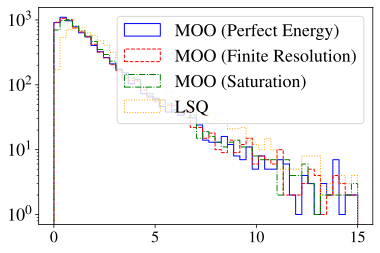

In [66]:
fig = plt.figure()
ax = fig.gca()

# x = cuore_deltas
# ax.hist(x,bins = 100)
bins = np.linspace(0,15,50)
array = ax.hist(perfect_theta_deltas, bins=bins,  histtype='step', color='b', ls='-', label="MOO (Perfect Energy)")
array = ax.hist(ideal_theta_deltas, bins=bins, histtype='step', color='r', ls='--', label="MOO (Finite Resolution)")
array = ax.hist(cuore_theta_deltas, bins=bins, histtype='step', color='g', ls='-.', label="MOO (Saturation)")
array = ax.hist(naive_theta_deltas, bins=bins, histtype='step', color='orange', ls=':', label="LSQ")
ax.set_yscale('log')
ax.legend()

[0.99026807 0.9945219  0.99756405 0.99939083 1.        ] [8. 6. 4. 2. 0.]


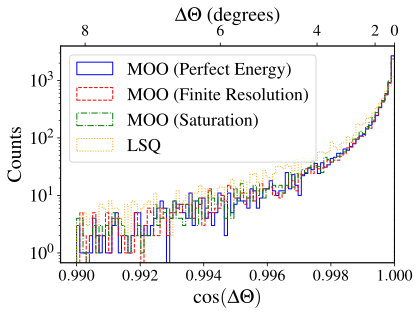

In [62]:
# plt.title(r"Delta-Error in Track Vector $\mu_M=1.6, \mu_N=$2.7")

# plt.ylabel("Count")
# plt.xlabel("Angular Error (degrees)")

fig = plt.figure()
ax = fig.gca()

# x = cuore_deltas
# ax.hist(x,bins = 100)
bins = np.linspace(.99,1,100)
array = ax.hist(perfect_deltas, bins=bins,  histtype='step', color='b', ls='-', label="MOO (Perfect Energy)")
array = ax.hist(ideal_deltas, bins=bins, histtype='step', color='r', ls='--', label="MOO (Finite Resolution)")
array = ax.hist(cuore_deltas, bins=bins, histtype='step', color='g', ls='-.', label="MOO (Saturation)")
array = ax.hist(naive_deltas, bins=bins, histtype='step', color='orange', ls=':', label="LSQ")

ax.set_xlabel(r'$\cos(\Delta\Theta)$')
ax.set_ylabel('Counts')
ax.set_xlim(xmax=1)
ax.set_yscale('log')

axt = ax.twiny()
axt.set_xlabel('$\Delta\Theta$ (degrees)')
axt.set_xlim(ax.get_xlim())

step_size=2
min_dTheta = 180/np.pi*np.arccos(axt.get_xlim()[0])
xticklabels = np.arange(0,min_dTheta,step_size)[::-1]
xticks = np.cos(np.pi*xticklabels/180)
print(xticks,xticklabels)
axt.set_xticks(xticks)
axt.set_xticklabels('%i'%i for i in xticklabels)

ax.legend(loc='upper left')

# plt.savefig('../plots/pdf/PointingAccuracy.pdf',bbox_inches = "tight")
# plt.savefig('../plots/png/PointingAccuracy.png',dpi=300,bbox_inches = "tight")

#plt.gca().set_yscale("log")

0.03976883450392365
0.02074770821702406
0.04190113189644456
0.022091728817914415


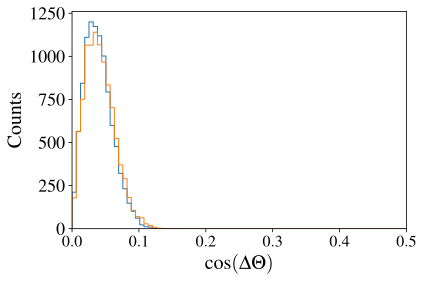

In [85]:
import numpy as npy
import matplotlib.pyplot as py


# x = 1-np.random.exponential(.001,10000)

fig = py.figure()
ax = fig.gca()

x = 1-np.random.exponential(.001,10000)
y = 1-np.random.exponential(.0011,10000)

ax.hist(np.arccos(x),np.linspace(0,.5,80), histtype='step')
ax.hist(np.arccos(y),np.linspace(0,.5,80), histtype='step')

ax.set_xlabel(r'$\cos(\Delta\Theta)$')
ax.set_ylabel('Counts')
ax.set_xlim([0,.5])

# axt = ax.twiny()
# axt.set_xlabel('$\Delta\Theta$ (degrees)')
# axt.set_xlim(ax.get_xlim())

# step_size=2
# min_dTheta = 180/np.pi*np.arccos(axt.get_xlim()[0])
# xticklabels = np.arange(0,min_dTheta,step_size)[::-1]
# xticks = np.cos(np.pi*xticklabels/180)
# print(xticks,xticklabels)
# axt.set_xticks(xticks)
# array = axt.set_xticklabels('%i'%i for i in xticklabels)

print(np.mean(np.arccos(x)))
print(np.std(np.arccos(x)))
print(np.mean(np.arccos(y)))
print(np.std(np.arccos(y)))

In [99]:
perfect_theta_deltas

array([1.12856064, 0.38056801, 0.85386111, ..., 1.91453872, 0.47763402,
       0.32059205])

In [100]:
np.arccos(perfect_deltas)

array([0.0196971 , 0.00664216, 0.01490269, ..., 0.033415  , 0.00833629,
       0.00559539])

In [102]:
def summary_stats(x) : 
    n = len(x)

    mu_x = np.mean((x - np.mean(x))**4)
    se_x = np.sqrt(1/n*(mu_x - (n-3)/(n-1) * np.std(x)**4))
    print(np.mean(x))
    print(np.std(x) / np.sqrt(n))
    print(np.std(x))
    print(se_x / (2 * np.std(x)))

    print()

summary_stats(perfect_theta_deltas)
summary_stats(ideal_theta_deltas)
summary_stats(cuore_theta_deltas)
summary_stats(naive_theta_deltas)


1.8113879247694513
0.023958159036247265
2.0503481527268477
0.04888175738921417

1.8281172955585423
0.024324334175732727
2.081685557227862
0.04986231749539333

1.8966356714434844
0.02347760265789276
2.009221959301487
0.0450256298749313

2.5492492785748473
0.025939489222598405
2.2199111263001012
0.038061561972556335



In [ ]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_proj_type('ortho')

ax.scatter3D(*np.concatenate(moo.get_clusterdf()['Fitline'].values).reshape(-1,6)[:,3:].T)

#plt.xlim([-1,1])
#plt.ylim([-1,1])
#ax.set_zlim([-350,350])

#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')

ax.view_init(25, 55)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

#plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Predicted cosZenith vs Azimuth", fontsize=18)
plt.ylabel('cos Zenith',fontsize=16)
plt.xlabel('Azimuth',fontsize=16)

array = plt.scatter(data.get_clusterdf()['Azimuth'], [math.cos(x) for x in data.get_clusterdf()['Zenith']])

xdata= data.get_clusterdf()['Azimuth'].values
ydata= [math.cos(x) for x in data.get_clusterdf()['Zenith'].values]
#x_bins= np.linspace(-math.pi/2,math.pi/2,20)
#y_bins= np.linspace(0,1,20)

counts,_,_= np.histogram2d(xdata, ydata, weights=theta_deltas, bins=(x_bins, y_bins))

pcolor=ax.pcolormesh(x_bins, y_bins, counts,norm=LogNorm())
#cbar=fig.colorbar(pcolor)



#h = plt.hist2d(xdata, ydata, bins=12,  weights=theta_deltas, cmap='cividis', norm=LogNorm())
cbar= plt.colorbar()


In [ ]:
a = [[1,2,3],[4,5,6]]

In [ ]:
[x[::-1] for x in a[::-1]]